In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, LabelBinarizer, MultiLabelBinarizer,MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Binarizer, KBinsDiscretizer, StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectFromModel, RFE, RFECV
import dask.dataframe as dd
import matplotlib.pyplot as plt


## Chargement des données

In [163]:
train = pd.read_csv(r'C:\Users\utilisateur\OneDrive\Documents\Mlearning\Brief_emploi\Emploi.csv') 
test = pd.read_csv(r'C:\Users\utilisateur\OneDrive\Documents\Mlearning\Brief_emploi\Emploi_test.csv')
# train = pd.read_csv(r'C:\Users\ThinkCentre\OneDrive\Documents\Mlearning\Brief_emploi\Emploi.csv') 
# test = pd.read_csv(r'C:\Users\ThinkCentre\OneDrive\Documents\Mlearning\Brief_emploi\Emploi_test.csv')

## Analyse des données

In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 16 columns):
_id                  1554 non-null object
Url                  1554 non-null object
Poste                1554 non-null object
Company              1554 non-null object
Contrat              1554 non-null object
Lieu                 1554 non-null object
Salaire              1554 non-null object
Date                 1554 non-null int64
Description          1554 non-null object
contrat_recherche    1554 non-null object
metier_recherche     1554 non-null object
Region               1554 non-null object
Salaire_min          1554 non-null int64
Salaire_max          1554 non-null int64
Salaire_mean         1554 non-null float64
Code_postal          1554 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 194.4+ KB


In [165]:
train.describe()

,Date,Salaire_min,Salaire_max,Salaire_mean,Code_postal
count,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000
mean,24.467181,45065.891248,52947.095882,49006.493565,67351.351351
std,16.272804,23454.239733,23958.893103,23384.481731,14053.942674
min,1.000000,72.000000,72.000000,72.000000,31000.000000
25%,8.000000,33000.000000,40000.000000,37000.000000,69000.000000
50%,28.000000,40000.000000,50000.000000,45000.000000,75000.000000
75%,40.000000,50000.000000,60000.000000,55000.000000,75000.000000
max,40.000000,159600.000000,159600.000000,159600.000000,75000.000000


In [166]:
train[["Contrat", "Salaire_mean"]].groupby(['Contrat'], as_index=False).mean().sort_values(by='Salaire_mean', ascending=False)

,Contrat,Salaire_mean
5,Freelance / Indépendant,100374.840764
1,Autres,49355.844156
3,CDI,45467.892596
6,Intérim,35241.739130
2,CDD,34960.333333
8,Temps partiel,26100.000000
0,Apprentissage,18580.687500
4,Contrat pro,17731.600000
7,Stage,10750.460526


[Text(0, 0, 'CDI'),
 Text(0, 0, 'Contrat pro'),
 Text(0, 0, 'CDD'),
 Text(0, 0, 'Intérim'),
 Text(0, 0, 'Apprentissage'),
 Text(0, 0, 'Stage'),
 Text(0, 0, 'Freelance / Indépendant'),
 Text(0, 0, 'Autres'),
 Text(0, 0, 'Temps partiel')]

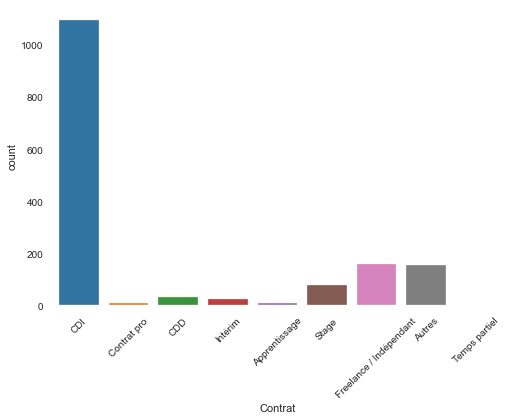

In [167]:
graph = sns.countplot(x='Contrat',data=train)
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)

[Text(0, 0, 'Developpeur'),
 Text(0, 0, 'Autre'),
 Text(0, 0, 'Business Intelligence'),
 Text(0, 0, 'Data Analyst'),
 Text(0, 0, 'Data Scientist')]

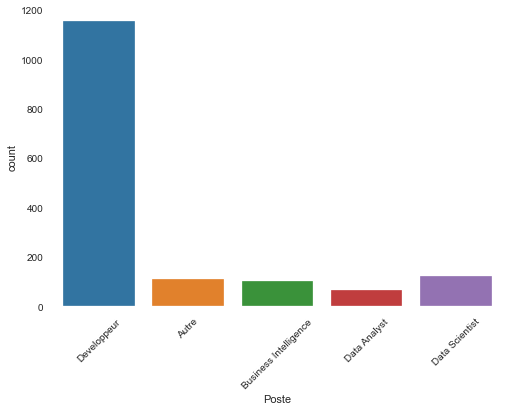

In [217]:
graph = sns.countplot(x='Poste',data=train)
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)

In [168]:
train[["Poste", "Salaire_mean"]].groupby(['Poste'], as_index=False).mean().sort_values(by='Salaire_mean', ascending=False)

,Poste,Salaire_mean
3,Data Scientist,56180.450820
4,Developpeur,48801.065915
2,Data Analyst,47679.569231
1,Business Intelligence,47359.783654
0,Autre,45544.159091


In [169]:
train[["Region", "Salaire_mean"]].groupby(['Region'], as_index=False).mean().sort_values(by='Salaire_mean', ascending=False)

,Region,Salaire_mean
1,Ile de france,54005.846798
5,Rhône Alpes,40438.237052
4,Pays de Loire,39544.183007
3,Midi Pyrénées,38862.641667
2,Lorraine,33452.461538
0,Aquitaine,20750.000000


In [170]:
train[["Company", "Salaire_mean"]].groupby(['Company'], as_index=False).mean().sort_values(by='Salaire_mean', ascending=False)

,Company,Salaire_mean
38,Almatek,141360.0
93,Club Freelance,136800.0
131,EXteam,136800.0
59,BlueSoftGroup,132240.0
171,Gentis Recruitment SAS,125400.0
...,...,...
392,Sportunity,6720.0
347,Polyconseil,6000.0
98,Coulommiers Pays de Brie,2355.0
192,HYD&AU FLUID,150.0


In [171]:
train[["Date", "Salaire_mean"]].groupby(['Date'], as_index=False).mean().sort_values(by='Salaire_mean', ascending=False)

,Date,Salaire_mean
27,29,67985.500000
18,19,65000.000000
10,11,60000.000000
21,22,56656.250000
22,23,51795.809524
16,17,51586.666667
4,5,51534.529412
29,40,51332.493369
15,16,50572.727273
14,15,50062.857143


In [172]:
df1 = train.copy()

ord = LabelEncoder()
df1['Company'] = ord.fit_transform(df1['Company'])
df1['Poste'] = ord.fit_transform(df1['Poste'])
df1['Contrat'] = ord.fit_transform(df1['Contrat'])
df1['Lieu'] = ord.fit_transform(df1['Lieu'])
df1['Region'] = ord.fit_transform(df1['Region'])
df1['contrat_recherche'] = ord.fit_transform(df1['contrat_recherche'])
df1['metier_recherche'] = ord.fit_transform(df1['metier_recherche'])

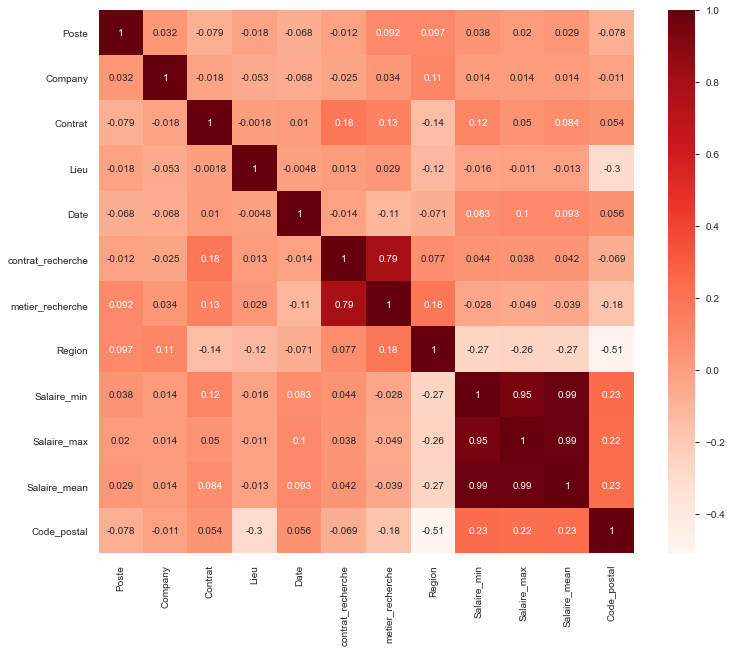

In [173]:
plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

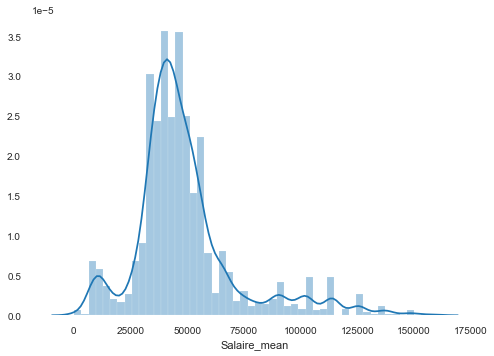

In [174]:
for col in train.select_dtypes('float'):
    plt.figure()
    sns.distplot(train[col])

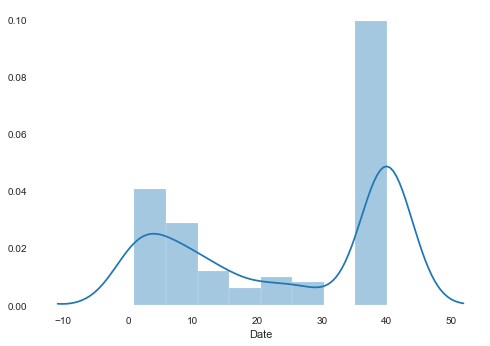

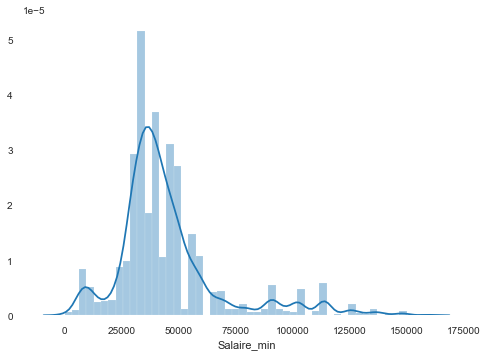

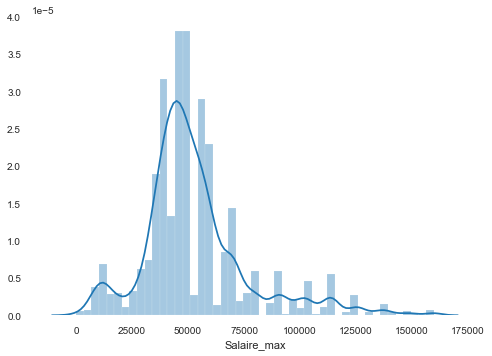

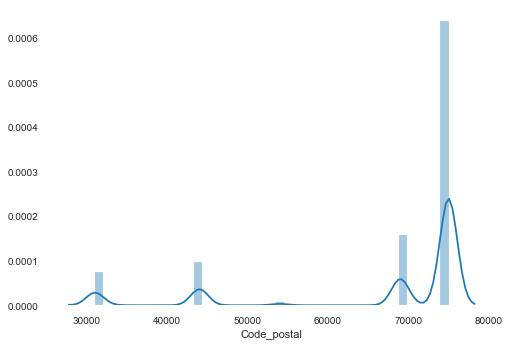

In [175]:
for col in train.select_dtypes('int64'):
    plt.figure()
    sns.distplot(train[col])
    

In [176]:
(train['Poste'].value_counts()/train.shape[0]).sort_values(ascending=True)

Data Analyst             0.041828
Business Intelligence    0.066924
Autre                    0.070785
Data Scientist           0.078507
Developpeur              0.741956
Name: Poste, dtype: float64

In [120]:
import pandas_profiling
train.profile_report()

build report structure: 100%|██████████| 1/1 [00:05<00:00,  5.14s/it]


## Nettoyage des données

### Création d'une colonne catégorie, qui classe les salaire par fourchettes de 10 000€

In [177]:
fourchette = 10000
cate = range(0,200000,fourchette)

train['Categorie'] = 0

for d,c in enumerate(cate) :
    if d < len(cate)-1 :
        for i,j in enumerate(train['Salaire_mean']):    
        
            if train['Salaire_mean'].iloc[i] < cate[d+1] and train['Salaire_mean'].iloc[i] >= c :
                train['Categorie'].iloc[i] = d  

len(train['Categorie'].value_counts())            

16

In [179]:
# train['salsup'] = train.Salaire_mean.map(lambda x: 0 if x <= train.Salaire_mean.quantile(0.5) else 1)
# train['salsup'].value_counts()

### Sauvegarde des dataset nettoyés

In [180]:
train.to_csv(r'C:\Users\utilisateur\OneDrive\Documents\Mlearning\Brief_emploi\dataset_nettoye_pour_ML.csv', index=False)

In [181]:
test.to_csv(r'C:\Users\utilisateur\OneDrive\Documents\Mlearning\Brief_emploi\dataset_a_predire.csv', index=False)

## Suppression des colonnes inutiles

In [182]:
# train = train.drop(['_id','Url','Description','Salaire_min','Salaire_max','Salaire','Salaire_mean','contrat_recherche','metier_recherche','Lieu'],axis=1)
# test = test.drop(['_id','Url','Description','contrat_recherche','metier_recherche','Lieu'],axis=1)
train = train.drop(['_id','Url','Description','Salaire_min','Salaire_max','Salaire','Salaire_mean','Lieu','contrat_recherche'],axis=1)
test = test.drop(['_id','Url','Description','Lieu','contrat_recherche'],axis=1)

## Target

In [183]:
y = train['Categorie']
X = train.drop(['Categorie'], axis=1)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Preprocessing

In [185]:
X_train.columns

Index(['Poste', 'Company', 'Contrat', 'Date', 'metier_recherche', 'Region',
       'Code_postal'],
      dtype='object')

### Encodage des variables qualitatives

In [186]:
ord = OrdinalEncoder()
X_train = ord.fit_transform(X_train)
X_test = ord.fit_transform(X_test)
test = ord.fit_transform(test)

### Normalisation des données

In [187]:
lab = StandardScaler()
X_train = lab.fit_transform(X_train)
X_test = lab.fit_transform(X_test) 
test = lab.fit_transform(test) 

## Model

In [188]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,SGDRegressor
from sklearn.cluster import MiniBatchKMeans,KMeans
from sklearn.svm import SVR
# model = make_pipeline(processor,AdaBoostRegressor())

# model = AdaBoostRegressor()

model = GradientBoostingRegressor()

# model = SVR()

# model = RandomForestRegressor()

model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [189]:
params = {    
    
    'n_estimators' : [50],     
    'loss' : ['huber'],
    'criterion' : ['friedman_mse', 'mse', 'mae'],
    # 'learning_rate' : [0.1,0.3,0.5,0.7,1], 
    # 'loss' : ['linear', 'square', 'exponential']
    # 'loss' : ['ls', 'lad', 'huber', 'quantile'],    
    # 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    # 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    # 'gamma' : ['scale','auto']
}



df_grid = pd.DataFrame(columns=['cv','score','best_params','grid'])
index = 0

for k in range(5,15) :
    grid = GridSearchCV(model, param_grid=params, cv=k, verbose = 1, n_jobs = -1)
    grid.fit(X_train,y_train)    
    df_grid.loc[index] = [k,grid.score(X_test,y_test),grid.best_params_,grid]
    index = index + 1

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 6 folds for each of 3 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 7 folds for each of 3 candidates, totalling 21 fits
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 8 folds for each of 3 candidates, totalling 24 fits
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 9 folds for each of 3 candidates, totalling 27 fits
[Parallel(n_jobs=-1)]: Done  27 out 

### Résultats

In [190]:
df_grid.sort_values(by = 'score', ascending=False, inplace=True)
df_grid.index = range(len(df_grid.index))

best_model = df_grid.loc[0,'grid']
df_grid.head(20)

,cv,score,best_params,grid
0,8,0.777748,"{'criterion': 'mse', 'loss': 'huber', 'n_estim...","GridSearchCV(cv=8, error_score=nan,\n ..."
1,13,0.777643,"{'criterion': 'mse', 'loss': 'huber', 'n_estim...","GridSearchCV(cv=13, error_score=nan,\n ..."
2,6,0.777603,"{'criterion': 'friedman_mse', 'loss': 'huber',...","GridSearchCV(cv=6, error_score=nan,\n ..."
3,11,0.777373,"{'criterion': 'friedman_mse', 'loss': 'huber',...","GridSearchCV(cv=11, error_score=nan,\n ..."
4,9,0.777227,"{'criterion': 'mse', 'loss': 'huber', 'n_estim...","GridSearchCV(cv=9, error_score=nan,\n ..."
5,14,0.776668,"{'criterion': 'mse', 'loss': 'huber', 'n_estim...","GridSearchCV(cv=14, error_score=nan,\n ..."
6,12,0.776627,"{'criterion': 'friedman_mse', 'loss': 'huber',...","GridSearchCV(cv=12, error_score=nan,\n ..."
7,5,0.776449,"{'criterion': 'mse', 'loss': 'huber', 'n_estim...","GridSearchCV(cv=5, error_score=nan,\n ..."
8,7,0.776372,"{'criterion': 'friedman_mse', 'loss': 'huber',...","GridSearchCV(cv=7, error_score=nan,\n ..."
9,10,0.776366,"{'criterion': 'friedman_mse', 'loss': 'huber',...","GridSearchCV(cv=10, error_score=nan,\n ..."


In [191]:
best_model.best_params_

{'criterion': 'mse', 'loss': 'huber', 'n_estimators': 50}

In [192]:
best_model.best_estimator_.score(X_test,y_test)

0.7777482610706752

## Evaluation du model

In [193]:
y_pred = best_model.predict(X_test)

In [194]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [195]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)
r2 = r2_score(y_test, y_pred)
adj_r2 =1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
#     print('Coefficients : ',model.coef_)
print('MAE : ',mae)
print('MAPE : ',mape,'%')
print('MSE : ',mse)
print('RMSE : ',rmse)
print('R² : ',r2)
print('Adjusted R² : ',adj_r2)

MAE :  0.8449680599127726
MAPE :  inf %
MSE :  1.2160619903200307
RMSE :  1.102752007624575
R² :  0.7777482610706752
Adjusted R² :  0.7726137324485456


## Metrics :

MAE :
MAE est simplement, comme son nom l'indique, la moyenne des erreurs absolues. L'erreur absolue est la valeur absolue de la différence entre la valeur prévue et la valeur réelle. MAE nous indique l'ampleur d'une erreur que nous pouvons attendre des prévisions en moyenne.

MAPE :
Erreur absolue moyenne en pourcentage.

RMSE : 
Pour ajuster les grandes erreurs rares, nous calculons l' erreur quadratique moyenne (RMSE) . En mettant les erreurs au carré avant de calculer leur moyenne, puis en prenant la racine carrée de la moyenne, nous arrivons à une mesure de la taille de l'erreur qui donne plus de poids aux erreurs importantes mais peu fréquentes que la moyenne.

Nous pouvons également comparer RMSE et MAE pour déterminer si la prévision contient des erreurs importantes mais peu fréquentes. Plus la différence entre RMSE et MAE est grande, plus la taille de l'erreur est incohérente.

R² :
Plus le coefficient de détermination se rapproche de 0, plus le nuage de points se disperse autour de la droite de régression. Au contraire, plus le R² tend vers 1, plus le nuage de points se resserre autour de la droite de régression. Quand les points sont exactement alignés sur la droite de régression, alors R² = 1.






## Learning Curve

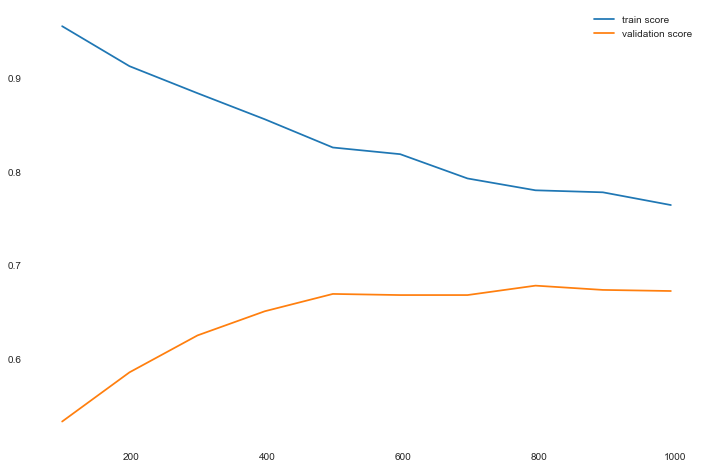

In [196]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

## Sauvegarde du model

In [197]:
from sklearn.externals import joblib

# joblib.dump(best_model, 'Indeed.joblib')

['Indeed.joblib']

## Chargement du model

In [198]:
# Indeed_model = joblib.load('Indeed.joblib')

## Prédiction

In [199]:
prediction = best_model.predict(test)

In [200]:
prediction

array([4.16360675, 4.39197471, 4.16360675, ..., 3.66703592, 3.7659343 ,
       3.37914223])

In [201]:
# test = pd.read_csv(r'C:\Users\ThinkCentre\OneDrive\Documents\Mlearning\Brief_emploi\Emploi_test.csv')
pred = pd.read_csv(r'C:\Users\utilisateur\OneDrive\Documents\Mlearning\Brief_emploi\Emploi_test.csv')

In [202]:
pred['Salaires_predit'] = prediction*10000

In [203]:
pred['Salaires_predit'] = np.array(pred['Salaires_predit'],dtype=int)

### Sauvegarde de la prédiction

In [204]:
pred.to_csv(r'C:\Users\utilisateur\OneDrive\Documents\Mlearning\Brief_emploi\predictions.csv', index=False)


## Analyse des données prédites

In [205]:
pred[["Poste", "Salaires_predit"]].groupby(['Poste'], as_index=False).mean().sort_values(by='Salaires_predit', ascending=False)

,Poste,Salaires_predit
3,Data Scientist,44098.630042
2,Data Analyst,43423.923077
1,Business Intelligence,43179.090323
4,Developpeur,42526.496734
0,Autre,41090.884384


In [206]:
pred[["Contrat", "Salaires_predit"]].groupby(['Contrat'], as_index=False).mean().sort_values(by='Salaires_predit', ascending=False)

,Contrat,Salaires_predit
5,Freelance / Indépendant,93705.440000
0,Apprentissage,45078.981132
1,Autres,44975.355208
3,CDI,40821.382757
2,CDD,37127.375000
7,Stage,35305.246281
6,Intérim,34960.089286
4,Contrat pro,24076.168467
8,Temps partiel,6024.857143
